### Importy

In [13]:
import pandas as pd 
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression #pozwala przewidywać ciągłe wartości, etykiedy są ciągłe między 0; 1 wybieramy regresje liniową a nie klasyfikacje
from sklearn.metrics import mean_squared_error, r2_score

### Zaimportowanie zbioru i przekształcenie na bardziej czytelny format 

In [14]:
dataset = load_dataset('google/civil_comments')
df = dataset['train'].to_pandas()

### Jak w ogóle wyglądają dane?

In [15]:
df.head()

,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
0,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
1,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
2,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
3,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
4,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.0,0.87234,0.021277,0.0


### Podział na dane wejściowe i dane wyjściowe, które model będzie przwidywał

In [16]:
labels = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']
X = df['text']
y = df[labels] 

### Podział na dane testowe 20% i treningowe 80%

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Użycie Tfidf

In [18]:
vectorizer = TfidfVectorizer(max_features=5000) # uniknięcie przetrenowania
X_train_tfidf = vectorizer.fit_transform(X_train) # uczy model jakie słowa są najważniejsze
X_test_tfidf = vectorizer.transform(X_test) # te same przekształcenia dla zbioru testowegp

## Trenownie modelu na regresji liniowej

In [19]:
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

LinearRegression()

### Sprawdzenie jak dobrze model dziła

In [20]:
y_predicted = model.predict(X_test_tfidf)
print(f'Mean squared error: {mean_squared_error(y_test, y_predicted)}')
print(f'R^2 score: {r2_score(y_test, y_predicted)}')

Mean squared error: 0.006664667649154403
R^2 score: 0.3222462819735331


In [21]:
def get_rating(comment):
    comment_tfidf = vectorizer.transform([comment])
    prediction = model.predict(comment_tfidf)
    return prediction[0]



### Przykład użycia

In [37]:
new_comment1 = "who allowed a woman to drive"
new_comment2 = "who allowed a man to drive"
print(labels)
print(new_comment1)
print(f'Toxicity score: {get_rating(new_comment1)}')
print(new_comment2)
print(f'Toxicity score: {get_rating(new_comment2)}')

['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']
who allowed a woman to drive
Toxicity score: [0.10054574 0.00555827 0.01083878 0.00879396 0.05663848 0.05750399
 0.02055586]
who allowed a man to drive
Toxicity score: [0.07338959 0.00304093 0.00791604 0.0043438  0.05286561 0.01990672
 0.00809305]


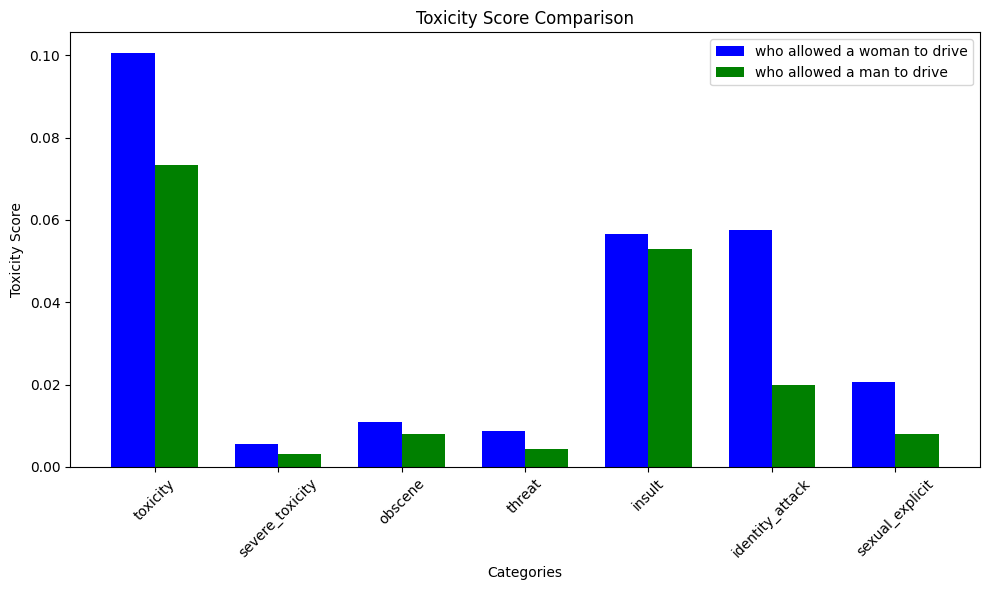

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Kategorie toksyczności
categories = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']

# Wyniki toksyczności dla obu zdań
toxicity_woman = [0.10054574, 0.00555827, 0.01083878, 0.00879396, 0.05663848, 0.05750399, 0.02055586]
toxicity_man = [0.07338959, 0.00304093, 0.00791604, 0.0043438, 0.05286561, 0.01990672, 0.00809305]

# Ustawienie pozycji na osi x
x = np.arange(len(categories))

# Szerokość słupków
width = 0.35

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))

# Słupki dla pierwszego zdania (kobieta)
bars_woman = ax.bar(x - width/2, toxicity_woman, width, label='who allowed a woman to drive', color='blue')

# Słupki dla drugiego zdania (mężczyzna)
bars_man = ax.bar(x + width/2, toxicity_man, width, label='who allowed a man to drive', color='green')

# Dodanie etykiet i tytułu
ax.set_xlabel('Categories')
ax.set_ylabel('Toxicity Score')
ax.set_title('Toxicity Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Wyświetlenie wykresu
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
